## Revise TOTA businesses

### Read files

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
### region shapefile
region = gpd.read_file('../data/raw/ADM_TOURISM_REGIONS_SP_apiname.geojson')

### tota members
tota_df = pd.read_csv('../data/raw/to-tourism-establishments_v2 - EXPORT_CSV.csv')

In [96]:
tota_df.columns

Index(['Company ID', 'Name of Business/Organization', 'Website',
       'Tourism Region', 'Tourism Sub-Region', 'Business Type',
       'Business Sub-Type', 'Indigenous Tourism', 'Biosphere Program Member',
       'Accessibility', 'Show_on_map', 'latitude', 'longitude', 'Source'],
      dtype='object')

In [97]:
### first filter by the ones to show on map
tota_df= tota_df[tota_df['Show_on_map']==True]

In [99]:
tota_na = tota_df[tota_df.latitude.isna()]

In [100]:
tota_na.to_csv('../../../../TOTA/tota_no_location.csv')

In [101]:
tota_df.dropna(subset=['latitude'],inplace=True)

In [102]:
tota_gdf = gpd.GeoDataFrame(tota_df, geometry=gpd.points_from_xy(tota_df.longitude, tota_df.latitude))

In [103]:
tota_gdf =tota_gdf.set_crs("EPSG:4326")

In [104]:
tota = gpd.sjoin(tota_gdf, region[['TOURISM_REGION_NAME','geometry']], how ='inner')

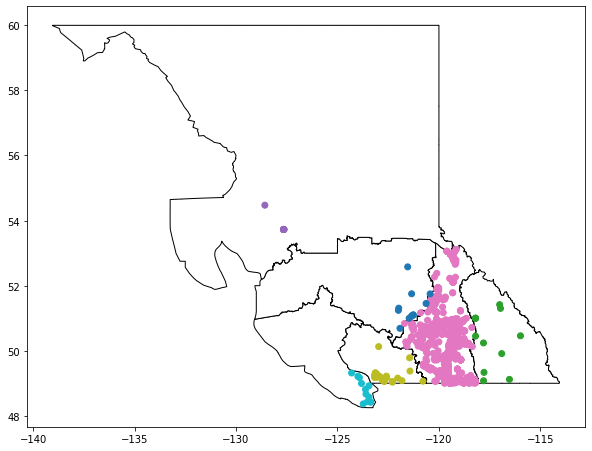

In [105]:
fig, ax = plt.subplots(figsize =(10,10))
region.plot(ax=ax, color='white', edgecolor='black')
tota.plot(ax=ax, column='TOURISM_REGION_NAME')

plt.show()

In [106]:
tota['TOURISM_REGION_NAME'].unique()

array(['thompson_okanagan', 'cariboo_chilcotin_coast',
       'vancouver_coast_and_mountains', 'vancouver_island',
       'northern_british_columbia', 'kootenay_rockies'], dtype=object)

In [107]:
tota[tota['TOURISM_REGION_NAME']!= 'thompson_okanagan'].to_csv('../../../../TOTA/tota_not_TO.csv')

In [108]:
tota_gdf['Name of Business/Organization'].values

array(['Planet Bee Honey Farm & Meadery',
       'Best Western Plus Kelowna Hotel & Suites',
       'Okanagan Lavender & Herb Farm', ...,
       'Zipity Doo Dah Adventures (zipline)',
       'Ashnola Campground / Snaʕsnulax̌tn Campground',
       'Spirit Ridge Vineyard Resort & Spa'], dtype=object)

In [109]:
out =list(set(tota_gdf['Name of Business/Organization'].values) ^ set(tota['Name of Business/Organization'].values))

In [110]:
tota_gdf[tota_gdf['Name of Business/Organization'].isin(out)].to_csv('../../../../TOTA/tota_not_BC.csv')